0       18752951
1       61196302
2       19238251
3       31180559
4       32852346
5       17149705
6       11373567
7       12149206
8       16082927
9        2841811
10      33492951
11      39409726
12       7662886
13      18824912
14      15899764
15      11569723
16      15830098
17             0
18      23603062
19      17687229
20      11593509
21      23440427
22      11347420
23       2137907
24        712562
25      14469618
26      16924523
27      15836366
28       2902714
29        459906
          ...   
4970      885667
4971     2414713
4972      673787
4973      829870
4974     1436546
4975      150091
4976      229079
4977      638404
4978      106628
4979     1558006
4980     6532616
4981      158905
4982      647435
4983      219238
4984     2875705
4985      820381
4986     1123300
4987     1536819
4988     1349511
4989      660742
4990           0
4991      663114
4992      131766
4993     1586835
4994     1099659
4995     2072942
4996     1055091
4997     32657

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


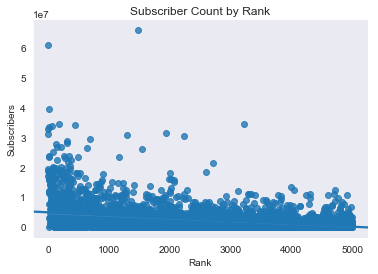

#####################################################################################################

#####################################################################################################



#####################################################################################################
MATPLOTLIB: LINE CHART SHOWING SUBSCRIBER COUNT BY RANK 
#####################################################################################################


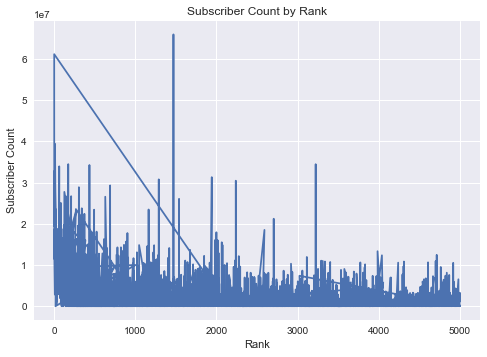

#####################################################################################################

#####################################################################################################



#####################################################################################################
MATPLOTLIB: BAR CHART SHOWING SUBSCRIBER COUNT BY GRADE 
#####################################################################################################


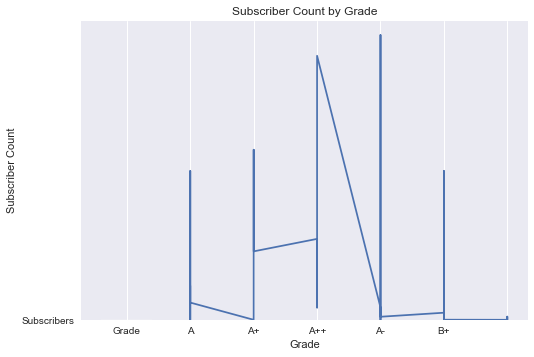

#####################################################################################################

#####################################################################################################





In [7]:
# Giulia Rapisardi
# CSC 201
# Assignment 9 - Cleaning, Summarizing, and Visualizing DataFrames

#  PROGRAM TITLE: YouTube Data PROGRAM
   
#  PROGRAM DESCRIPTION: A Python program that opens and reads the data from the CSV file into a 
#                      
                        
#  GENERAL SOLUTION: A Python program that opens and reads the data from the CSV file into a 
#                       Pandas DataFrame and uses this DataFrame to output information from it
#                       based on the user's choice. The choices in this program include:
#                             output information available in DataFrame on a channel's rank
#                             output information available in DataFrame on a channel's grade
#                             Quit the program.

#  PSEUDOCODE: 

# import libraries needed for this program including
#        pandas,
#        numpy,
#        matplotlib.pyplot
#        matplotlib.ticker
#        seaborn
import pandas as pd, numpy as np, re, matplotlib.pyplot as plt, matplotlib.ticker as plticker, seaborn as sns

# func name: read_as_dataframe
# arguments: 1 string representing the file path and name of the csv file
# return: 1 pandas dataframe with the csv data
# description: reads the csv data set into a pandas dataframe
def read_as_dataframe(filename): 
# read the csv data into a pandas dataframe and store dataframe
    #      in variable called df
    df = pd.read_csv(filename)
  
    return df

# func name: visually_inspect
# arguments: 1 pandas dataframe with csv data
# return: none
# desription: visually inspects the pandas dataframe for data errors in it
#             such as missing values, duplicate data, incorrect data types, etc.
def visually_inspect(df):
    #print(df.info())
    print('\n\n')
    
    # output the frequency of each value in each column to identify
    #        duplicate or NaN values
   # print(df['Subscribers'].value_counts(dropna = False))
    print('\n\n')

    #print(df['Rank'].value_counts(dropna = False))
    print('\n\n')
    
    #print(df['Grade'].value_counts(dropna = False))
    print('\n\n')
    
    #print(df['Channel name'].value_counts(dropna = False))
    print('\n\n')
    
    #print(df['Video Uploads'].value_counts(dropna = False))
    print('\n\n')
    
    #print(df['Video views'].value_counts(dropna = False))
    print('\n\n')
    
    #only for columns with missing or duplicate data (suspicious data columns)
    print(df['Subscribers'].value_counts(dropna = False))
    
    print(df.describe())
    print('\n\n')
    
    return

def cleaning(df):
    df.drop_duplicates(inplace = True)
    
    df['Video views'] = pd.to_numeric(df['Video views'], errors = 'coerce')
    
    #drop any NaN (missing) values from the dataframe
    df.dropna(inplace = True)
    
    
    # reset the index
    df.reset_index(drop = True, inplace = True)
    
    #return the cleaned df
    return df


# func name: output_min_max
# arguments: 1 pandas dataframe with csv data, 
#            1 string representing column name in dataframe,
#            1 string representing the subset name
# return: none
# description: output the minimum and maximum values of the passed subset
def output_min_max(df, col_name, subset_name):
     # output the minimum value of the age group subset
    print("The minimum " + col_name + " of the " + subset_name + " subset is " + str(df[col_name].min()) + ".")
    
    # output the maximum value of the age group subset
    print("The maximum " + col_name + " of the " + subset_name + " subset is " + str(df[col_name].max()) + ".")
    
    # return nothing
    return 



# func name: summary_and_pivot_tables
# arguments: 1 pandas dataframe with csv data
# return: 1 pivot table for Subscribers
#         1 pivot table for Video views
#         1 pivot table for Video Uploads
# description: create summary/pivot tables on pandas dataframe and subsets with csv data
def summary_and_pivot_tables(df):
   
    # .transform --> creates new column w statistic in parenthesis in quotation marks
    # create new column in data frame 
    df['Subscribers'] = df['Subscribers'].groupby(df['Subscribers']).transform('mean')
    # tell us the number of decimal places we want to round to
    df['Subscribers'] = round(df['Subscribers'], 2)
    print(df['Subscribers'])

    df['Video views'] = df['Video views'].groupby(df['Video views']).transform('mean')
    # tell us the number of decimal places we want to round to
    df['Video views'] = round(df['Video views'], 2)
    print(df['Video views'])
    
    df['Video Uploads'] = df['Video Uploads'].groupby(df['Video Uploads']).transform('mean')
    # tell us the number of decimal places we want to round to
    df['Video Uploads'] = round(df['Video Uploads'], 2)
    print(df['Video Uploads'])

    df.sort_values('Grade', inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    
     
    # output the Grade and Subscriber count for each Rank to identify some trends/patterns
    #        note that there's a lot of information and it doesn't show each age group (only 7 and 73)
    #        it also repeats the average rating for each age group so it's not really helpful
    #        to show any trends
    #        this is why we need to filter and create summary/pivot tables using groupby and pivot_table
    print('#####################################################################################################')
    print('AVERAGE SUBSRIBER COUNT FOR EACH GRADE')
    print('#####################################################################################################')
    print(df[['Grade', 'Subscribers']])
    print('#####################################################################################################')
    print('')
    print('#####################################################################################################')
    print('\n\n')
    
    
    # filtering the dataframe
    #     all this means is creating subsets from the dataframe
    #     think back to spreadsheets when you selected specific columns and rows
    #     in the data to focus and applied statistics to these values
    #     same thing is happening when filtering the dataframe!
    #
    # let's create some subsets for the Grades to break them into four groups (A++, A+, A, A-, B+) 
    print('#####################################################################################################')
    print('MINIMUM/MAXIMUM SUBSCRIBERS OF EACH AGE GROUP')
    print('#####################################################################################################')
    max_grade = df['Grade'].max()

    
    b_plus = df[(df['Grade'] == 'B+')]
    output_min_max(b_plus, 'Subscribers', 'B+')
    print('\n')
    
    a_minus = df[(df['Grade'] == 'A-')]
    output_min_max(a_minus, 'Subscribers', 'A-')
    print('\n')
    
    a = df[(df['Grade'] == 'A')]
    output_min_max(a, 'Subscribers', 'A')
    print('\n')
    
    a_plus = df[(df['Grade'] == 'A+')]
    output_min_max(a_plus, 'Subscribers', 'A+')
    print('\n')
    
    a_plusplus = df[(df['Grade'] == 'A++')]
    output_min_max(a_plusplus, 'Subscribers', 'A++')
    print('\n')

    
    print('#####################################################################################################')
    print('')
    print('#####################################################################################################')
    print('\n\n')
    
    
    # pivot tables
    #       similar to groupby where it creates a summary table as you did in spreadsheets
    #       only difference between groupby and pivot table is the shape of the result
    #       pivot table shape is where the specified index is on the row axis, 
    #             the specified column is on the column axis, 
    #             and the values are the values in each cell where a statistic can be applied 
    # let's start with a simple example of using pivot table to show average ratings of each age group
    print('#####################################################################################################')
    print('AVERAGE SUBSCRIBER COUNT BY GRADE PIVOT TABLE ')
    print('#####################################################################################################')
    print(b_plus.pivot_table(values = 'Subscribers', index = 'Grade', aggfunc= {'Subscribers': np.mean}))
    print('\n\n')
    
    print(a_minus.pivot_table(values = 'Subscribers', index = 'Grade'))
    print('\n\n')
    
    print(a.pivot_table(values = 'Subscribers', index = 'Grade'))
    print('\n\n')
    
    print(a_plus.pivot_table(values = 'Subscribers', index = 'Grade'))
    print('\n\n')
    
    print(a_plusplus.pivot_table(values = 'Subscribers', index = 'Grade'))
    print('\n\n')
    

    print('#####################################################################################################')
    print('')
    print('#####################################################################################################')
    print('\n\n')
    
    
    
    print('#####################################################################################################')
    print('AVERAGE VIDEO UPLOADS BY GRADE PIVOT TABLE ')
    print('#####################################################################################################')
    print(b_plus.pivot_table(values = 'Video Uploads', index = 'Grade', aggfunc= {'Video Uploads': np.mean}))
    print('\n\n')
    
    print(a_minus.pivot_table(values = 'Video Uploads', index = 'Grade'))
    print('\n\n')
    
    print(a.pivot_table(values = 'Video Uploads', index = 'Grade'))
    print('\n\n')
    
    print(a_plus.pivot_table(values = 'Video Uploads', index = 'Grade'))
    print('\n\n')
    
    print(a_plusplus.pivot_table(values = 'Video Uploads', index = 'Grade'))
    print('\n\n')
    
    
    
    return b_plus, a_minus, a, a_plus, a_plusplus


# func name: basic_visuals
# arguments: 1 pandas dataframe with csv data
# return: none
# description: outputs basic visualizations relevant to data-driven question
#              including line and scatter charts 
# note: did not include bar chart because it took too long 
def basic_visuals(df):
    print('#####################################################################################################')
    print('SNS: SCATTER CHART SHOWING SUBSCRIBER COUNT BY RANK WITH TRENDLINE ')
    print('#####################################################################################################')
    # plot a scatter chart with trendline for the ages and average rating
    #      using seaborn
    sns.set_style("dark")
    sns.regplot(x="Rank", y="Subscribers", data=df)
    plt.title('Subscriber Count by Rank')
    plt.xlabel('Rank')
    plt.ylabel('Subscribers')
    sns.despine()
    
    plt.show()
    print('#####################################################################################################')
    print('')
    print('#####################################################################################################')
    print('\n\n')
    
    
    
    print('#####################################################################################################')
    print('MATPLOTLIB: LINE CHART SHOWING SUBSCRIBER COUNT BY RANK ')
    print('#####################################################################################################')
    # plot a line chart for the ages and average ratings using matplotlib
    plt.style.use('seaborn')
    plt.plot(df["Rank"], df["Subscribers"])
    plt.title('Subscriber Count by Rank')
    plt.xlabel('Rank')
    plt.ylabel('Subscriber Count')
    plt.show()
    print('#####################################################################################################')
    print('')
    print('#####################################################################################################')
    print('\n\n')
    
    
    print('#####################################################################################################')
    print('MATPLOTLIB: BAR CHART SHOWING SUBSCRIBER COUNT BY GRADE ')
    print('#####################################################################################################')
    # plot a Bar chart for the ages and average ratings using matplotlib
    plt.bar("Grade", "Subscribers")
    plt.plot(df["Grade"], df["Subscribers"])
    plt.title('Subscriber Count by Grade')
    plt.xlabel('Grade')
    plt.ylabel('Subscriber Count')
    plt.show()
    print('#####################################################################################################')
    print('')
    print('#####################################################################################################')
    print('\n\n')
    
    
    return


# func name: pivot_table_visuals
# arguments: 1 pandas dataframe with csv data, 
#            1 pivot table for B+ with Subscriber,
#            1 pivot table for A- with Subscriber, 
#            1 pivot table for A with Subscriber, 
#            1 pivot table for A+ with Subscriber and, 
#            1 pivot table for A++ with Subscriber
# return: none
# description: create visualizations for each pivot table
def pivot_table_visuals(df, b_plus, a_minus, a, a_plus, a_plusplus):
    print('#####################################################################################################')
    print('PLOTTING B+ PIVOT TABLE DATA ')
    print('#####################################################################################################')
    # plotting your pivot tables
    #          plot the youth pivot table as a bar chart
    sns.set_style("dark")
    b_plus_bar = b_plus.plot(kind = 'bar')
    b_plus_bar.axes.set_xticklabels(['0','1,000,000','2,000,000','3,000,000','4,000,000','5,000,000'])
    b_plus_bar.set_title('Range of Subscribers of Grade B+')
    b_plus_bar.set_xlabel('Subscriber Count')
    b_plus_bar.set_ylabel('Grade B+')
    b_plus_bar.legend(['Grade', 'Subscribers'], bbox_to_anchor=(1, 1))
    sns.despine()
    plt.show()
    
    print('#####################################################################################################')
    print('PLOTTING A- PIVOT TABLE DATA ')
    print('#####################################################################################################')
    sns.set_style("dark")
    a_minus_bar = a_minus.plot(kind = 'bar')
    a_minus_bar.axes.set_xticklabels(['0','1,000,000','2,000,000','3,000,000','4,000,000','5,000,000'])
    a_minus_bar.set_title('Range of Subscribers of Grade A-')
    a_minus_bar.set_xlabel('Subscriber count')
    a_minus_bar.set_ylabel('Grade A-')
    a_minus_bar.legend(['Grade', 'Subscribers'], bbox_to_anchor=(1, 1))
    sns.despine()
    plt.show()
   
    print('#####################################################################################################')
    print('PLOTTING A PIVOT TABLE DATA ')
    print('#####################################################################################################')
    sns.set_style("dark")
    a_bar = a.plot(kind = 'bar')
    a_bar.axes.set_xticklabels(['0','1,000,000','2,000,000','3,000,000','4,000,000','5,000,000'])
    a_bar.set_title('Range of Subscribers of Grade A')
    a_bar.set_xlabel('Subscriber count')
    a_bar.set_ylabel('Grade A')
    a_bar.legend(['Grade', 'Subscribers'], bbox_to_anchor=(1, 1))
    sns.despine()
    plt.show()
    
    
    print('#####################################################################################################')
    print('PLOTTING A+ PIVOT TABLE DATA ')
    print('#####################################################################################################')
    sns.set_style("dark")
    a_plus_bar = a_plus.plot(kind = 'bar')
    a_plus_bar.axes.set_xticklabels(['0','1,000,000','2,000,000','3,000,000','4,000,000','5,000,000'])
    a_plus_bar.set_title('Range of Subscribers of Grade A+')
    a_plus_bar.set_xlabel('Subscriber count')
    a_plus_bar.set_ylabel('Grade A+')
    a_plus_bar.legend(['Grade', 'Subscribers'], bbox_to_anchor=(1, 1))
    sns.despine()
    plt.show()

    print('#####################################################################################################')
    print('PLOTTING A++ PIVOT TABLE DATA ')
    print('#####################################################################################################')
    sns.set_style("dark")
    a_plusplus_bar = a_plusplus.plot(kind = 'bar')
    a_plusplus_bar.axes.set_xticklabels(['0','1,000,000','2,000,000','3,000,000','4,000,000','5,000,000'])
    a_plusplus_bar.set_title('Range of Subscribers of Grade A++')
    a_plusplus_bar.set_xlabel('Subscriber count')
    a_plusplus_bar.set_ylabel('Grade A++')
    a_plusplus_bar.legend(['Grade', 'Subscribers'], bbox_to_anchor=(1, 1))
    sns.despine()
    plt.show()
    

def main():
    file = './data/youtubedata2.csv'
    
    df = read_as_dataframe(file)
    
   # visually_inspect(df)
    
    df = cleaning(df)
    
    
   # # call visually inspect again to ensure that the changes were 
    #visually_inspect(df)
    
   # output_min_max(df, "Grade", "A+")
    
    summary_and_pivot_tables(df)
    
    basic_visuals(df)
    
    
    # create summary/pivot tables for each age group
   # b_plus, a_minus, a, a_plus, a_plusplus = summary_and_pivot_tables(df)
    
    # plotting pivot table visuals
   # pivot_table_visuals(df, b_plus, a_minus, a, a_plus, a_plusplus)
    
    return

main()
    
    
